## **Task # 2 To Explore Supervised Machine Learning**
In this notebook I am using Python Scikit-Learn library for machine learning to implement simple linear regression functions.

### **Simple Linear Regression**
- In this regression task I will be predicting the percentage of marks that a student is expected to score based upon the number of hours studied. 
- This is a simple linear regression tas involving just two variables.

**Author**: *Pintu Ram*

### Importing Libraries

In [1]:
# Importing all required libraries
import pandas as pd # used for data processing and analysis
import numpy as np  # used for various array's operation
import matplotlib.pyplot as plt  # used for data visualization
%matplotlib inline  

### Loading Dataset

In [2]:
data = pd.read_csv('task2_data.csv') # pandas read_csv function used loading data

In [3]:
data.head() # by default picking 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape # get no. of rows and columns from dataset

(25, 2)

In [5]:
data.describe() # get summary of statistical details pertaining to columns of dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()  # get concise summary/ basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Ploting Graph

Now ploting the data points in a 2D graph to eyeball our dataset and see if we can manually find any relationship between the data.

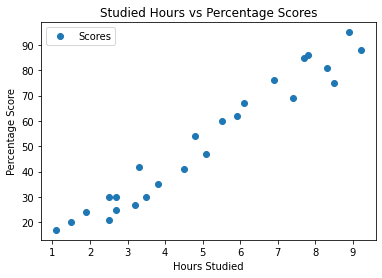

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Studied Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = data.iloc[:, :-1].values  # attributes as inputs
Y = data.iloc[:, 1].values  # labels as outputs

In [9]:
print('inputs:\n')
print(X)

inputs:

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
print('outputs:\n')
print(Y)

outputs:

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Spiliting the dataset into Training and Testing datasets

- Now we have our attributes as _inputs_ and labels as _outputs_.
- The next step is to split this data into training and test sets. 
- for this We wiil be using Python's Scikit-Learn's built-in _train_test_split()_ method:

In [11]:
# importing the method called train_test_split from sklearn's model_selection
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
- Now, We have splite the data into training and testing sets.
- And now finally we'll train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


### Plotting Regression
- As we have trained our algorithm of regression.
- now we'll plot it in a graph.

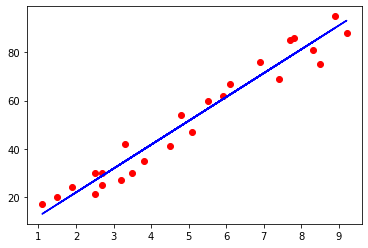

In [13]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='red')
plt.plot(X, line, color='blue');
plt.show()

### **Making Predictions**
- As we have trained our algorithm and see in a graph
- Now we'll make some predictions.

In [14]:
# first printing the testing data (in hours)
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# now we'll predict the scores (in presentage)
Y_predict = regressor.predict(X_test) # Predicting the scores
print(Y_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [16]:
# Comparing Actual data vs Predicted data
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predict})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting score if a student studies for 9.25 hours

In [17]:
# now I will predcit with my own data
hours = 9.25
my_predict = regressor.predict([[hours]])
print("No of Hours a student sudies = {}".format(hours))
print("Predicted Score of marks in % = {}".format(my_predict[0]))

No of Hours a student sudies = 9.25
Predicted Score of marks in % = 93.69173248737538


### **Evaluating the model**

- Finally we'll be evaluating the performance of algorithm. 
- By calcuating some metrices like mean square error, etc.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))

Mean Absolute Error: 4.183859899002975


In [19]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))

Mean Squared Error: 21.5987693072174


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

Root Mean Squared Error: 4.6474476121003665


### Checking Accurancy of the Model 

- R Squared value is close to 1, this is a good model

In [21]:
regressor.score(X,Y)

0.9526947647057274

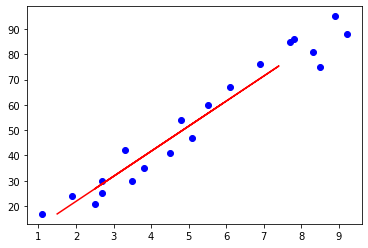

In [22]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_test,Y_predict, color='red')
plt.show()

**Our model is 95.26% accurate**